In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv("training_data.csv")
#tenor_pred=pd.read_csv("/content/onlytenors.csv")
#final_pred=pd.read_csv("/content/final.csv")
#test_pred=pd.read_csv("/content/Test (1).csv")

In [3]:
df

,Date,Tenor,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,1/5/2017,2M,0.468214,0.419251,0.376260,0.338158,0.304372,0.274823,0.250066,0.231535,0.221404,0.220933,0.228418,0.240437,0.254316,0.268613,0.282659,0.296172,0.309045,0.321260,0.332831
1,1/5/2017,3M,0.458471,0.412710,0.372717,0.337489,0.306511,0.279714,0.257540,0.241007,0.231434,0.229423,0.233839,0.242411,0.253100,0.264611,0.276244,0.287647,0.298654,0.309196,0.319254
2,1/5/2017,6M,0.410305,0.374189,0.343045,0.316070,0.292842,0.273231,0.257346,0.245440,0.237726,0.234116,0.234078,0.236765,0.241295,0.246945,0.253200,0.259726,0.266312,0.272831,0.279207
3,1/5/2017,9M,0.385267,0.354580,0.328360,0.305878,0.286712,0.270643,0.257590,0.247529,0.240401,0.236030,0.234085,0.234121,0.235658,0.238264,0.241586,0.245360,0.249397,0.253564,0.257773
4,1/5/2017,1Y,0.358986,0.333608,0.312126,0.293870,0.278408,0.265457,0.254819,0.246339,0.239855,0.235185,0.232109,0.230384,0.229760,0.230003,0.230908,0.232303,0.234052,0.236049,0.238213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13637,10/14/2019,15Y,0.290467,0.274071,0.259819,0.247286,0.236167,0.226238,0.217329,0.209309,0.202077,0.195550,0.189663,0.184359,0.179593,0.175321,0.171508,0.168118,0.165119,0.162481,0.160172
13638,10/14/2019,20Y,0.279726,0.263635,0.249695,0.237473,0.226660,0.217030,0.208411,0.200674,0.193716,0.187456,0.181826,0.176772,0.172247,0.168208,0.164617,0.161440,0.158642,0.156194,0.154063
13639,10/14/2019,25Y,0.275693,0.259711,0.245916,0.233859,0.223221,0.213769,0.205330,0.197769,0.190981,0.184884,0.179409,0.174499,0.170106,0.166187,0.162703,0.159618,0.156900,0.154517,0.152440
13640,10/14/2019,30Y,0.271637,0.256054,0.242648,0.230965,0.220685,0.211571,0.203450,0.196186,0.189673,0.183826,0.178577,0.173867,0.169647,0.165873,0.162507,0.159514,0.156861,0.154518,0.152458


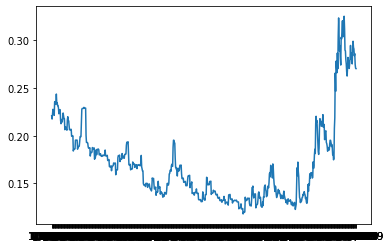

In [6]:

abc=df.loc[df['Tenor']=='2M']
x=abc['Date']
y=abc['1']
plt.plot(x,y)
plt.show()

In [2]:
data=df.copy()
data=df.loc[:,['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       '0.9', '1', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9']]
data.rename(columns = {'1':'1.0'}, inplace = True)
data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,0.468214,0.419251,0.376260,0.338158,0.304372,0.274823,0.250066,0.231535,0.221404,0.220933,0.228418,0.240437,0.254316,0.268613,0.282659,0.296172,0.309045,0.321260,0.332831
1,0.458471,0.412710,0.372717,0.337489,0.306511,0.279714,0.257540,0.241007,0.231434,0.229423,0.233839,0.242411,0.253100,0.264611,0.276244,0.287647,0.298654,0.309196,0.319254
2,0.410305,0.374189,0.343045,0.316070,0.292842,0.273231,0.257346,0.245440,0.237726,0.234116,0.234078,0.236765,0.241295,0.246945,0.253200,0.259726,0.266312,0.272831,0.279207
3,0.385267,0.354580,0.328360,0.305878,0.286712,0.270643,0.257590,0.247529,0.240401,0.236030,0.234085,0.234121,0.235658,0.238264,0.241586,0.245360,0.249397,0.253564,0.257773
4,0.358986,0.333608,0.312126,0.293870,0.278408,0.265457,0.254819,0.246339,0.239855,0.235185,0.232109,0.230384,0.229760,0.230003,0.230908,0.232303,0.234052,0.236049,0.238213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13637,0.290467,0.274071,0.259819,0.247286,0.236167,0.226238,0.217329,0.209309,0.202077,0.195550,0.189663,0.184359,0.179593,0.175321,0.171508,0.168118,0.165119,0.162481,0.160172
13638,0.279726,0.263635,0.249695,0.237473,0.226660,0.217030,0.208411,0.200674,0.193716,0.187456,0.181826,0.176772,0.172247,0.168208,0.164617,0.161440,0.158642,0.156194,0.154063
13639,0.275693,0.259711,0.245916,0.233859,0.223221,0.213769,0.205330,0.197769,0.190981,0.184884,0.179409,0.174499,0.170106,0.166187,0.162703,0.159618,0.156900,0.154517,0.152440
13640,0.271637,0.256054,0.242648,0.230965,0.220685,0.211571,0.203450,0.196186,0.189673,0.183826,0.178577,0.173867,0.169647,0.165873,0.162507,0.159514,0.156861,0.154518,0.152458


In [ ]:
import math
master=[]
for i in range(0,17): 
  lst=[]
  for j in range(1,20):
    temp=[]
    k=str(format(j/10, '.1f'))
    for p in range(i,13640,19):
      temp.append(np.array([data[k][p],data[k][p+1],data[k][p+2]]))
    lst.append(temp)
  lst=np.array(lst)
  master.append((lst))


In [ ]:
for i in range(17):
  master[i]=master[i].reshape(19*718,3)
  master[i]=pd.DataFrame(master[i])

In [ ]:
mastermaster=[]
for i in range(0,17):
  singlemaster=[]
  for j in range(0,13642,718):
    singlemaster.append(master[i].loc[j:j+717])
  mastermaster.append(singlemaster)

Mastermaster has 17 lists, all of which have 19 dataframes inside them. Each dataframe has the 19 moneyness values for 3 consec tenor values. 

In [ ]:
for i in range(17):
  for j in range(19):
    k=mastermaster[i][j].to_numpy()
    mastermaster[i][j]=pd.DataFrame(k)

In [ ]:

final=[]
pk=0
for i in range(17):
  semifinal=[]
  kp=0
  pk+=1
  print(pk)
  for j in range(19):
    kp+=1
    print(kp)
    sub_data=mastermaster[i][j].copy()
    model=tf.keras.Sequential([tf.keras.layers.LSTM(512,input_shape=(300,1)),
                        tf.keras.layers.Dense(128),
                        tf.keras.layers.Dense(32),
                        tf.keras.layers.Dense(30)])
    model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mean_absolute_error'])
    sub_data=sub_data.loc[:709]
    for k in range(0,600,10):
      sub_sub_data=tf.convert_to_tensor(np.asarray([sub_data.loc[k:k+99].to_numpy().flatten()]).astype(np.float32))
      sub_sub_train=tf.convert_to_tensor(np.asarray([sub_data.loc[k+100:k+109].to_numpy().flatten()]).astype(np.float32))
      model.fit(sub_sub_data,sub_sub_train,verbose=0)
    temp1=sub_data.copy()
    for p in range(710,820,10):
      m=model.predict(np.array([temp1.loc[p-100:p-1].to_numpy().flatten()]))
      m=pd.DataFrame(m[0].reshape((10,3)))
      temp1=pd.concat([temp1,m],ignore_index=True)
    semifinal.append(temp1)
  final.append(semifinal)
final

1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[[            0         1         2
  0    0.468214  0.458471  0.410305
  1    0.468220  0.460244  0.409161
  2    0.468419  0.459448  0.409367
  3    0.471292  0.459440  0.409361
  4    0.468138  0.459081  0.409164
  ..        ...       ...       ...
  815  0.714602  0.550060  0.478655
  816  0.688843  0.600364  0.536075
  817  0.721064  0.552423  0.537554
  818  0.664191  0.632642  0.504507
  819  0.671558  0.576789  0.494235
  
  [820 rows x 3 columns],             0         1         2
  0    0.419251  0.412710  0.374189
  1    0.418810  0.413967  0.372934
  2    0.419788  0.414029  0.373721
  3    0.422782  0.414015  0.373710
  4    0.419851  0.413759  0.373566
  ..        ...       ...       ...
  815  0.640964  0.576637  0.482877
  816  0.655126  0.556530  0.504972
  817  0.666299  0.575097  0.491268
  818  0.665055  0.574745  0.514057
  819  0.631137  0.559096  0.464444
  
  [820 rows x 3 columns],             0         1         2
  0    0.376260  0.372717  0.343045
  1    0.3

In [ ]:
import pickle


In [ ]:
#from google.colab import files
#files.download('FinalValues.pickle')
final2=[]
pk=0
for i in range(17):
  semifinal=[]
  kp=0
  pk+=1
  print(pk)
  for j in range(19):
    kp+=1
    print(kp)
    sub_data=mastermaster[i][j].copy()
    model=tf.keras.Sequential([tf.keras.layers.LSTM(512,input_shape=(300,1)),
                        tf.keras.layers.Dense(128),
                        tf.keras.layers.Dense(32),
                        tf.keras.layers.Dense(30)])
    model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mean_absolute_error'])
    sub_data=sub_data.loc[:609]
    for k in range(0,500,10):
      sub_sub_data=tf.convert_to_tensor(np.asarray([sub_data.loc[k:k+99].to_numpy().flatten()]).astype(np.float32))
      sub_sub_train=tf.convert_to_tensor(np.asarray([sub_data.loc[k+100:k+109].to_numpy().flatten()]).astype(np.float32))
      model.fit(sub_sub_data,sub_sub_train,verbose=0)
    temp1=sub_data.copy()
    for p in range(610,720,10):
      m=model.predict(np.array([temp1.loc[p-100:p-1].to_numpy().flatten()]))
      m=pd.DataFrame(m[0].reshape((10,3)))
      temp1=pd.concat([temp1,m],ignore_index=True)
    semifinal.append(temp1)
  final2.append(semifinal)
final2

1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
3
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
5
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
6
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
7
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
8
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
9
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
10
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
11
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
12
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
13
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
14
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
15
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[[            0         1         2
  0    0.468214  0.458471  0.410305
  1    0.468220  0.460244  0.409161
  2    0.468419  0.459448  0.409367
  3    0.471292  0.459440  0.409361
  4    0.468138  0.459081  0.409164
  ..        ...       ...       ...
  715  0.568306  0.442707  0.373270
  716  0.517203  0.480834  0.430164
  717  0.571803  0.445702  0.423084
  718  0.535667  0.476688  0.367779
  719  0.555026  0.464381  0.435715
  
  [720 rows x 3 columns],             0         1         2
  0    0.419251  0.412710  0.374189
  1    0.418810  0.413967  0.372934
  2    0.419788  0.414029  0.373721
  3    0.422782  0.414015  0.373710
  4    0.419851  0.413759  0.373566
  ..        ...       ...       ...
  715  0.422840  0.390201  0.325273
  716  0.429937  0.400022  0.355338
  717  0.433276  0.387544  0.314193
  718  0.420305  0.419556  0.362851
  719  0.422648  0.377119  0.330910
  
  [720 rows x 3 columns],             0         1         2
  0    0.376260  0.372717  0.343045
  1    0.3

In [ ]:
import pickle
filename = 'TestValues'
outfile = open(filename,'wb')
pickle.dump(final2,outfile)

from google.colab import files
files.download('TestValues')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
m=np.array(final2)
m.shape

(17, 19, 720, 3)

In [ ]:
final2

[[            0         1         2
  0    0.468214  0.458471  0.410305
  1    0.468220  0.460244  0.409161
  2    0.468419  0.459448  0.409367
  3    0.471292  0.459440  0.409361
  4    0.468138  0.459081  0.409164
  ..        ...       ...       ...
  715  0.568306  0.442707  0.373270
  716  0.517203  0.480834  0.430164
  717  0.571803  0.445702  0.423084
  718  0.535667  0.476688  0.367779
  719  0.555026  0.464381  0.435715
  
  [720 rows x 3 columns],             0         1         2
  0    0.419251  0.412710  0.374189
  1    0.418810  0.413967  0.372934
  2    0.419788  0.414029  0.373721
  3    0.422782  0.414015  0.373710
  4    0.419851  0.413759  0.373566
  ..        ...       ...       ...
  715  0.422840  0.390201  0.325273
  716  0.429937  0.400022  0.355338
  717  0.433276  0.387544  0.314193
  718  0.420305  0.419556  0.362851
  719  0.422648  0.377119  0.330910
  
  [720 rows x 3 columns],             0         1         2
  0    0.376260  0.372717  0.343045
  1    0.3

In [ ]:
infile=open('FinalValues','rb')
final1=pickle.load(infile)

In [ ]:
import math
dummy=pd.DataFrame()
#2nd jiro for the moneyness
for j in range(19):
  k=[]
  for i in range(0,720):
    k.append(final2[0][j][0][i])
    k.append((final2[0][j][1][i]+final2[1][j][0][i])/2)
    k.append((final2[0][j][2][i]+final2[1][j][1][i]+final2[2][j][0][i])/3)
    k.append((final2[1][j][2][i]+final2[2][j][1][i]+final2[3][j][0][i])/3)
    k.append((final2[2][j][2][i]+final2[3][j][1][i]+final2[4][j][0][i])/3)
    k.append((final2[3][j][2][i]+final2[4][j][1][i]+final2[5][j][0][i])/3)
    k.append((final2[4][j][2][i]+final2[5][j][1][i]+final2[6][j][0][i])/3)
    k.append((final2[5][j][2][i]+final2[6][j][1][i]+final2[7][j][0][i])/3)
    k.append((final2[6][j][2][i]+final2[7][j][1][i]+final2[8][j][0][i])/3)
    k.append((final2[7][j][2][i]+final2[8][j][1][i]+final2[9][j][0][i])/3)
    k.append((final2[8][j][2][i]+final2[9][j][1][i]+final2[10][j][0][i])/3)
    k.append((final2[9][j][2][i]+final2[10][j][1][i]+final2[11][j][0][i])/3)
    k.append((final2[10][j][2][i]+final2[11][j][1][i]+final2[12][j][0][i])/3)
    k.append((final2[11][j][2][i]+final2[12][j][1][i]+final2[13][j][0][i])/3)
    k.append((final2[12][j][2][i]+final2[13][j][1][i]+final2[14][j][0][i])/3)
    k.append((final2[13][j][2][i]+final2[14][j][1][i]+final2[15][j][0][i])/3)
    k.append((final2[14][j][2][i]+final2[15][j][1][i]+final2[16][j][0][i])/3)
    k.append((final2[15][j][2][i]+final2[16][j][1][i])/2)
    k.append((final2[16][j][2][i]))
  index=str(((j+1)/10))
  dummy[index]=k

In [ ]:
import math
dummy=pd.DataFrame()
#2nd jiro for the moneyness
for j in range(19):
  k=[]
  for i in range(0,820):
    k.append(final1[0][j][0][i])
    k.append((final1[0][j][1][i]+final1[1][j][0][i])/2)
    k.append((final1[0][j][2][i]+final1[1][j][1][i]+final1[2][j][0][i])/3)
    k.append((final1[1][j][2][i]+final1[2][j][1][i]+final1[3][j][0][i])/3)
    k.append((final1[2][j][2][i]+final1[3][j][1][i]+final1[4][j][0][i])/3)
    k.append((final1[3][j][2][i]+final1[4][j][1][i]+final1[5][j][0][i])/3)
    k.append((final1[4][j][2][i]+final1[5][j][1][i]+final1[6][j][0][i])/3)
    k.append((final1[5][j][2][i]+final1[6][j][1][i]+final1[7][j][0][i])/3)
    k.append((final1[6][j][2][i]+final1[7][j][1][i]+final1[8][j][0][i])/3)
    k.append((final1[7][j][2][i]+final1[8][j][1][i]+final1[9][j][0][i])/3)
    k.append((final1[8][j][2][i]+final1[9][j][1][i]+final1[10][j][0][i])/3)
    k.append((final1[9][j][2][i]+final1[10][j][1][i]+final1[11][j][0][i])/3)
    k.append((final1[10][j][2][i]+final1[11][j][1][i]+final1[12][j][0][i])/3)
    k.append((final1[11][j][2][i]+final1[12][j][1][i]+final1[13][j][0][i])/3)
    k.append((final1[12][j][2][i]+final1[13][j][1][i]+final1[14][j][0][i])/3)
    k.append((final1[13][j][2][i]+final1[14][j][1][i]+final1[15][j][0][i])/3)
    k.append((final1[14][j][2][i]+final1[15][j][1][i]+final1[16][j][0][i])/3)
    k.append((final1[15][j][2][i]+final1[16][j][1][i])/2)
    k.append((final1[16][j][2][i]))
  index=str(format(((j+1)/10),'.1f'))
  dummy[index]=k

In [ ]:
dummy.to_csv('Final.csv')

In [ ]:
beta=pd.read_csv('Test.csv')


In [ ]:
data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,0.468214,0.419251,0.376260,0.338158,0.304372,0.274823,0.250066,0.231535,0.221404,0.220933,0.228418,0.240437,0.254316,0.268613,0.282659,0.296172,0.309045,0.321260,0.332831
1,0.458471,0.412710,0.372717,0.337489,0.306511,0.279714,0.257540,0.241007,0.231434,0.229423,0.233839,0.242411,0.253100,0.264611,0.276244,0.287647,0.298654,0.309196,0.319254
2,0.410305,0.374189,0.343045,0.316070,0.292842,0.273231,0.257346,0.245440,0.237726,0.234116,0.234078,0.236765,0.241295,0.246945,0.253200,0.259726,0.266312,0.272831,0.279207
3,0.385267,0.354580,0.328360,0.305878,0.286712,0.270643,0.257590,0.247529,0.240401,0.236030,0.234085,0.234121,0.235658,0.238264,0.241586,0.245360,0.249397,0.253564,0.257773
4,0.358986,0.333608,0.312126,0.293870,0.278408,0.265457,0.254819,0.246339,0.239855,0.235185,0.232109,0.230384,0.229760,0.230003,0.230908,0.232303,0.234052,0.236049,0.238213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13637,0.290467,0.274071,0.259819,0.247286,0.236167,0.226238,0.217329,0.209309,0.202077,0.195550,0.189663,0.184359,0.179593,0.175321,0.171508,0.168118,0.165119,0.162481,0.160172
13638,0.279726,0.263635,0.249695,0.237473,0.226660,0.217030,0.208411,0.200674,0.193716,0.187456,0.181826,0.176772,0.172247,0.168208,0.164617,0.161440,0.158642,0.156194,0.154063
13639,0.275693,0.259711,0.245916,0.233859,0.223221,0.213769,0.205330,0.197769,0.190981,0.184884,0.179409,0.174499,0.170106,0.166187,0.162703,0.159618,0.156900,0.154517,0.152440
13640,0.271637,0.256054,0.242648,0.230965,0.220685,0.211571,0.203450,0.196186,0.189673,0.183826,0.178577,0.173867,0.169647,0.165873,0.162507,0.159514,0.156861,0.154518,0.152458


In [ ]:
dummy

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9
0,0.468214,0.419251,0.376260,0.338158,0.304372,0.274823,0.250066,0.231535,0.221404,0.220933,0.228418,0.240437,0.254316,0.268613,0.282659,0.296172,0.309045,0.321260,0.332831
1,0.458471,0.412710,0.372717,0.337489,0.306511,0.279714,0.257540,0.241007,0.231434,0.229423,0.233839,0.242411,0.253100,0.264611,0.276244,0.287647,0.298654,0.309196,0.319254
2,0.410305,0.374189,0.343045,0.316070,0.292842,0.273231,0.257346,0.245440,0.237726,0.234116,0.234078,0.236765,0.241295,0.246945,0.253200,0.259726,0.266312,0.272831,0.279207
3,0.385267,0.354580,0.328360,0.305878,0.286712,0.270643,0.257590,0.247529,0.240401,0.236030,0.234085,0.234121,0.235658,0.238264,0.241586,0.245360,0.249397,0.253564,0.257773
4,0.358986,0.333608,0.312126,0.293870,0.278408,0.265457,0.254819,0.246339,0.239855,0.235185,0.232109,0.230384,0.229760,0.230003,0.230908,0.232303,0.234052,0.236049,0.238213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15575,0.314919,0.295029,0.289831,0.268052,0.277682,0.263069,0.247764,0.246514,0.243925,0.221340,0.223731,0.215986,0.209179,0.214040,0.211831,0.213017,0.205494,0.207620,0.198906
15576,0.317405,0.297462,0.288101,0.276348,0.266719,0.253248,0.249296,0.233149,0.230225,0.214293,0.222517,0.212001,0.202023,0.216465,0.193184,0.190222,0.194779,0.195432,0.197112
15577,0.308691,0.293665,0.277262,0.278890,0.272612,0.242689,0.244729,0.243832,0.231268,0.203561,0.224560,0.212063,0.186631,0.203194,0.197678,0.200667,0.205695,0.196595,0.186059
15578,0.317850,0.286589,0.285709,0.277631,0.270103,0.248099,0.245157,0.240817,0.225017,0.207217,0.224775,0.203878,0.195745,0.189601,0.196411,0.189840,0.201187,0.206115,0.178710


In [ ]:
beta.columns

Index(['Unnamed: 0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       '0.9', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9'],
      dtype='object')

In [ ]:
for i in range(0,100):
  m=i/100
  